<a href="https://colab.research.google.com/github/minju960/Study_Kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning to Predict Titanic Survivors

 In this Kernel, I will step by step process messy data and build a ML model to predict the survival of each passenger aboard the Titanic.
 This guide is meant for people starting with data visualization, analysis and Machine Learning.


---

그리고 생각하는 것 만큼 어렵지 않다고 한다.


# Classification vs. Regression

As you know, predicting Titanic survivors is a supervised classification Machine Learning problem, where you classify a passenger as either survived, or not survived.


---
아시다시피, 타이타닉의 생존자를 예측하는 것은 감독되는 분류 기계 학습 문제로, 승객을 생존자로 분류하거나 생존하지 못한 것으로 분류합니다.

In [2]:
# Google Drive 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing Libraries and Packages

We will use these packages to help us manipulate the data and visualize the features/labels as well as measure how well our model performed. Numpy and Pandas are helpful for manipulating the dataframe and its columns and cells. We will use matplotlib along with Seaborn to visualize our data.


---
패키지 -> 데이터 조작, 기능과 라벨을 시각화, 모델이 얼마나 잘 수행되었는지 측정

Numpy, Pandas -> 데이터 프레임과 이것의 열과 행 조작 가능

Seaborn, Matplotlib -> 데이터 시각화


## Numpy, Pandas 차이

머신러닝과 딥러닝 할 때 구분해서 사용하면 좋다.


> Numpy 

(핵심기능 : 다차원 배열인 ndarray 클래스, 배열의 모든 원소는 동일한 데이터 타입이여야 한다)



*   다차원 배열 객체
*   유니버설 함수
*   배열을 사용한 데이터 처리
*   배열의 파일 입력, 출력
*   선형대수
*   난수 생성
*   브로드캐스팅
*   객체 생성이기 때문에 객체 주소지만 참조

> Pandas

*   테이블을 수정하고 조작하는 다양한 기능 제공
*   SQL처럼 테이블에 쿼리나 조인 수행 가능
*   각 열의 타입이 달라도 된다
*   SQL, 엑셀파일, CSV 파일과 데이터베이스의 데이터를 읽어 들인다

> 정리

*   Numpy : 같은 데이터타입의 다차원 배열, 난수생성 가능, 연산 가능
*   Pandas : 다른 데이터타입을 담을 수 있는 테이블, SQL 쿼리로 데이터 편집 가능









In [3]:
import numpy as np
import pandas as pd

# Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
import seaborn as sns
# 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 파이썬 라이브러리
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 즉 브라우저 내부에 바로 그려지도록 해주는 코드.
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
DIR_PATH = "/content/drive/MyDrive/Colab Notebooks/data/Data_Titanic"
print(os.listdir(DIR_PATH))

['gender_submission.csv', 'train.csv', 'test.csv']


# 2. Loading and Viewing Data Set

With Pandas, we can load both the training and testing set that we wil later use to train and test our model. Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics. We can also look at its keys and column names.


---
시작하기 전에 먼저 데이터 테이블 살펴보고 작업할 값을 확인해야 한다.

헤드, 함수 사용 -> 샘플 데이터와 통계 확인 가능. 또 그것의 키와 열 이름을 볼 수 있음.


In [4]:
training = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Data_Titanic/train.csv')
testing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Data_Titanic/test.csv')

In [5]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


This data looks very messy! We're going to have to preprocess it before it's ready to be used in Machine Learning models. 


---
데이터가 복잡해 보인다. 머신러닝 모델에 사용하기 전에 전처리를 해야한다.


In [7]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are the numerical features")
print(num_values)

These are the numerical features
Age     float64
Fare    float64
dtype: object


In [10]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Note: Only Age and Fare are the actual numerical values above and that the other features are just represented with numbers.

---
Age, Fare 만 실제 값이고, 나머지는 그냥 숫자로 표현된 것이다?



# 3. Dealing with NaN Values (Imputation)
There are NaN values in our data set in the age column. Furthermore, the Cabin column has a lot of missing values as well. These NaN values will get in the way of training our model. We need to fill in the NaN values with replacement values in order for the model to have a complete prediction for every row in the data set. This process is known as imputation and we will show how to replace the missing data.


---


age 열에 NaN 값들이 있다.
게다가 Cabin 열에는 많은 missing values 가 있다.
모델이 데이터 세트의 모든 행에 대해 완전한 예측을 갖도록하려면 NaN 값을 대체 값으로 채워야합니다.
이 프로세스를 imputation 라고 하며, 우리는 누락 된 데이터를 대체하는 방법을 보여 줄 것이다.

In [11]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Cabin has a lot of missing values. Also, it seems as though the Ticket feature is too noisy to be useful. We can probably drop both features without it impacting the performance of our model.

In [12]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


We take a look at the distribution of the Age column to see if it's skewed or symmetrical. This will help us determine what value to replace the NaN values.


---

Age 열의 분포를 살펴보고 치우친지 대칭인지 확인한다. NaN 값을 대체할 값을 결정하는 데 도움이 된다.


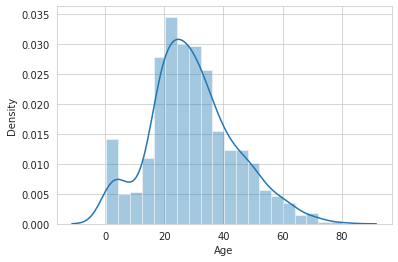

In [13]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

Looks like the distribution of ages is slightly skewed right. Because of this, we can fill in the null values with the median for the most accuracy.

---
Age 분포가 약간 왜곡된 것 같다. 이 때문에 가장 정확도 높이기 위해 중앙값으로 null 값을 채울 수 있다.


Note. We do not want to fill with the mean because the skewed distribution means that very large values on one end will greatly impact the mean, as opposed to the median, which will only be slightly impacted.

---
평균으로 채우고 싶지 않다. 왜냐하면 치우친 분포는 한쪽 끝의 매우 큰 값이 평균에 크게 영향을 끼치며, 약간만 영향을 받는 중앙값에 큰 영향을 미치므로.


In [14]:
# the median will be an acceptable value to place in the NaN cells
# 중앙값은 NaN 셀에 배치할 수 있는 값이다

training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(training["Age"].median(), inplace = True)
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


No more missing values. Now let's take a look at our imputed data.

In [15]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [16]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


# 4. Plotting and Visualizing Data
It is very important to understand and visualize any data we are going to use in a machine learning model. By visualizing, we can see the trends and general associations of variables like Sex and Age with survival rate. We can make several different graphs for each feature we want to work with to see the entropy and information gain of the feature.

---
시각화를 통해 성별 및 연령과 같은 변수의 추세와 일반적인 연관성을 생존율과 연관시킬 수 있다.

기능의 엔트로피와 정보 획득을 확인하기 위해 작업하려는 각 기능에 대해 여러가지 다른 그래프를 만들 수 있다.


**Gender**

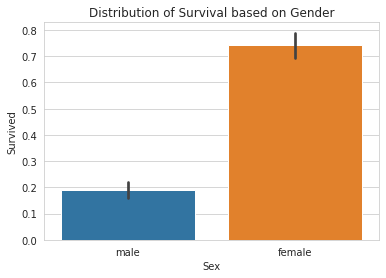

Total peaple survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [19]:
#can ignore the testing set for now

sns.barplot(x="Sex", y="Survived", data = training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total peaple survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:")
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

Note: The numbers printed above are the proportion of male/female survivors of all the surviviors ONLY. The graph shows the propotion of male/females out of ALL the passengers including those that didn't survive.

---
위에 print 된 숫자는 모든 생존자들 중 남자, 여자 생존자의 비율이다.

그래프는 생존하지 못한 승객을 포함한 모든 승객들 중 남자, 여자의 비율을 보여준다.(???)


Gender appears to be a very good feature to use to predict survival, as shown by the large difference in propotion survived. Let's take a look at how class plays a role in survival as well.

**Class**

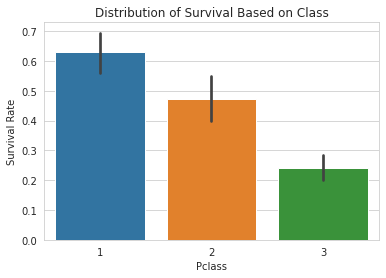

Total people survived is:342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [20]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is:" + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:")
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

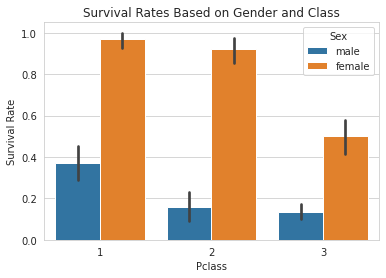

In [21]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

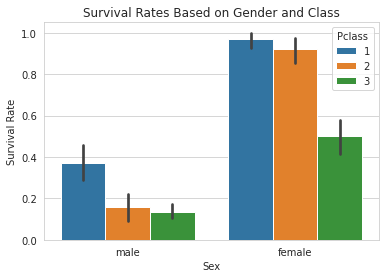

In [22]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

It appears that class also plays a role in survival, as shown by the bar graph. People in Pclass 1 were more likely to survive than people in the other 2 Pclasses.

**Age**

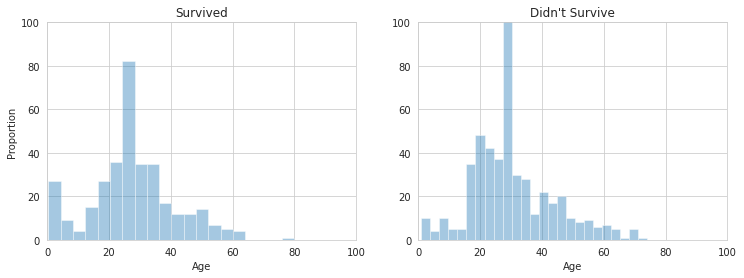

In [23]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

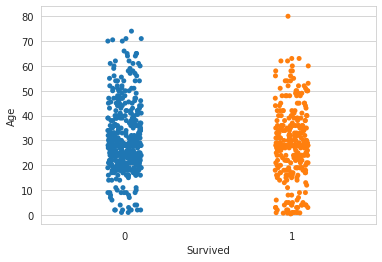

In [24]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

It appears as though passengers in the younger range of ages were more likely to survive than those in the older range of ages, as seen by the clustering in the strip plot, as well as the survival distributions of the histogram.

Here is one final cumulative graph of a pair plot that shows the relations between all of the different features

---

서로 다른 모든 기능 간의 관계를 보여주는 쌍 그림의 최종 누적 그래프

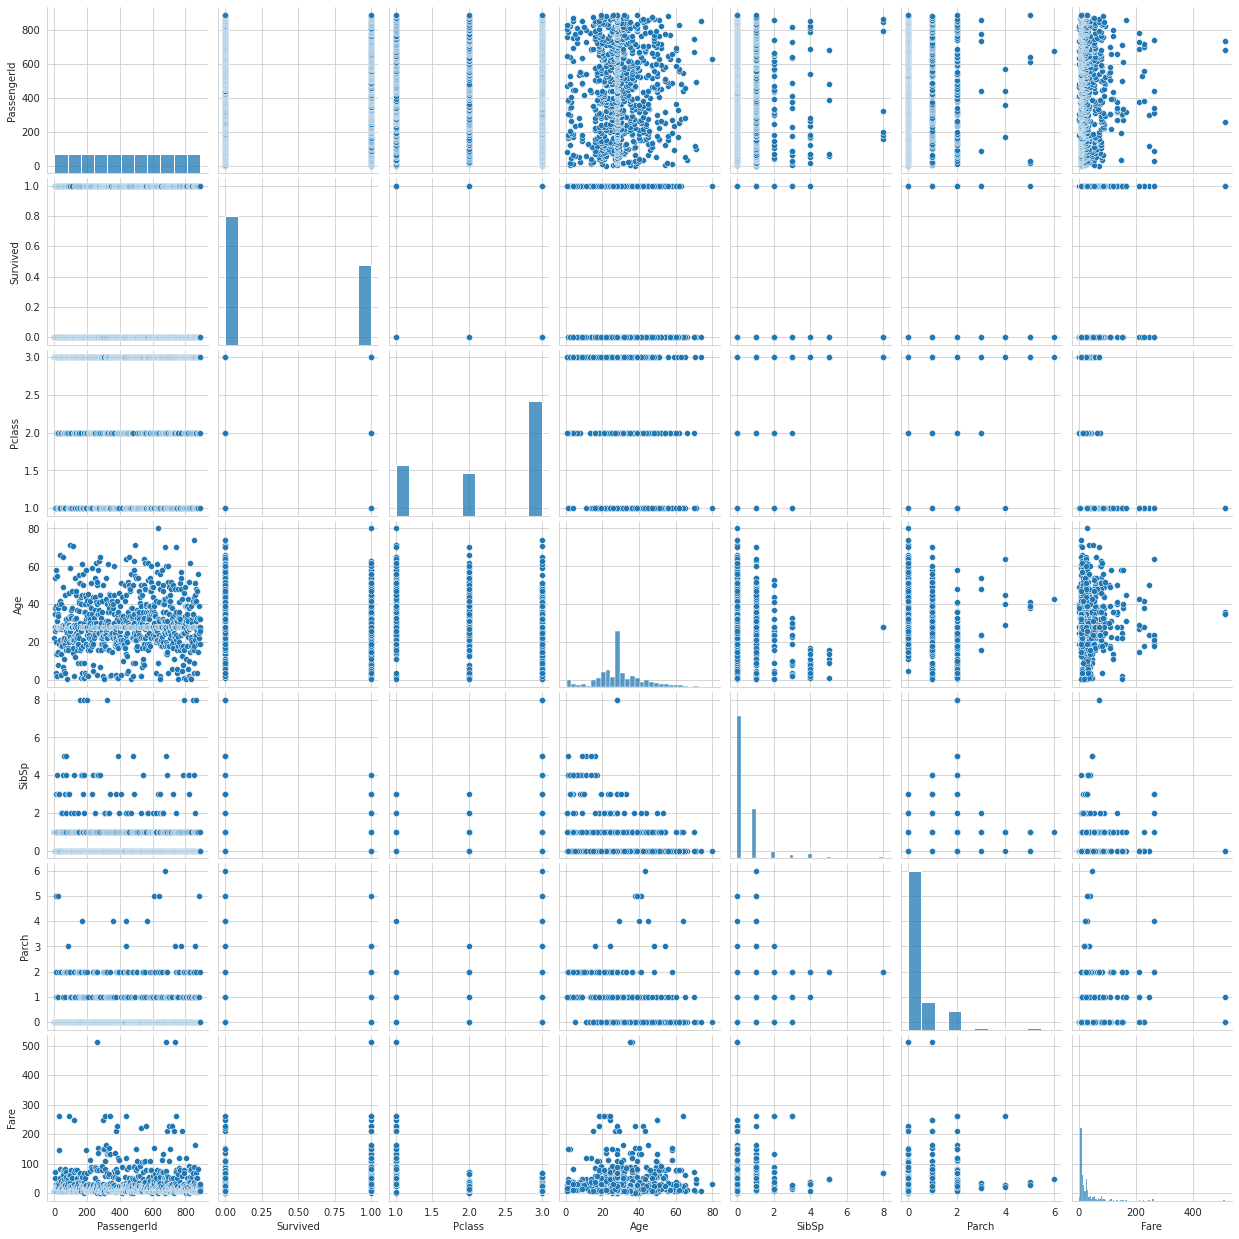

In [25]:
sns.pairplot(training)

# 5. Feature Engineering
Because values in the Sex and Embarked columns are categorical values, we have to represent these strings as numerical values in order to perform our classification with our model. We can also do this process through One-Hot-Encoding.

---
모델로 분류를 수행하려면 문자 값을 숫자 값으로 나타내야 한다. One-Hot-Encoding을 통해 이 프로세스를 수행 할 수 있다.


In [26]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,7.8542,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,76.7292,C
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S
524,525,0,3,"Kassem, Mr. Fared",male,28.0,0,0,7.2292,C
358,359,1,3,"McGovern, Miss. Mary",female,28.0,0,0,7.8792,Q


In [27]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,26.0000,S
148,1040,1,"Crafton, Mr. John Bertram",male,28.0,0,0,26.5500,S
417,1309,3,"Peter, Master. Michael J",male,28.0,1,1,22.3583,C
49,941,3,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",female,36.0,0,2,15.9000,S
55,947,3,"Rice, Master. Albert",male,10.0,4,1,29.1250,Q


We change Sex to binary, as either 1 for female or 0 for male. We do the same for Embarked. We do this same process on both the training and testing set to prepare our data for Machine Learning.

---
여성을 1, 남성을 0으로 변경한다.
Embarked 도 마찬가지.


In [29]:
set(training["Embarked"])

{'C', 'Q', 'S'}

There are 3 values for Embarked: S, C, and Q. We will represent these with numbers as well.

In [30]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

#Here's how to do it manually in Python without packages
"""
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2
"""

'\ntraining.loc[training["Sex"] == "male", "Sex"] = 0\ntraining.loc[training["Sex"] == "female", "Sex"] = 1\n\ntraining.loc[training["Embarked"] == "S", "Embarked"] = 0\ntraining.loc[training["Embarked"] == "C", "Embarked"] = 1\ntraining.loc[training["Embarked"] == "Q", "Embarked"] = 2\n\ntesting.loc[testing["Sex"] == "male", "Sex"] = 0\ntesting.loc[testing["Sex"] == "female", "Sex"] = 1\n\ntesting.loc[testing["Embarked"] == "S", "Embarked"] = 0\ntesting.loc[testing["Embarked"] == "C", "Embarked"] = 1\ntesting.loc[testing["Embarked"] == "Q", "Embarked"] = 2\n'

In [31]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
755,756,1,2,"Hamalainen, Master. Viljo",1,0.67,1,1,14.5000,2
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",0,23.00,0,0,7.5500,2
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",1,29.00,0,0,9.5000,2
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,45.00,1,4,27.9000,2
395,396,0,3,"Johansson, Mr. Erik",1,22.00,0,0,7.7958,2


In [32]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
107,999,3,"Ryan, Mr. Edward",1,28.0,0,0,7.750,1
320,1212,3,"Andersson, Mr. Johan Samuel",1,26.0,0,0,7.775,2
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,76.0,1,0,78.850,2
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",0,48.0,0,2,36.750,2
120,1012,2,"Watt, Miss. Bertha J",0,12.0,0,0,15.750,2


# Creating Synthetic Features
Sometimes it is useful to create synthetic features that we think may help us predict the target value.

---
합성 기능?


We can combine SibSp and Parch into one synthetic feature called family size, which indicates the total number of family members on board for each member.

In [34]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

This IsAlone feature also may work well with the data we're dealing with, telling us whether the passenger was along or not on the ship.

---

IsAlone 기능 : 우리가 다루는 데이터와 잘 작동하여 승객이 배에 있는지 여부를 알려준다.

In [35]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

Although it may not seem like it, we can also extract some useful information from the name column. Not the actual names themselves, but the title of their names like Ms. or Mr. This may also provide a hint as to whether the passenger survived or not. Therefore we can extract this title and then encode it like we did for Sex and Embarked.

---

이름 열에서 유용한 정보를 추출 할 수도 있다. Ms. 또는 Mr. 과 같은 title도 승객의 생존 여부에 대한 힌트를 제공 할 수 있다. 따라서 이 title을 추출한 다음 Sex, Embarked 에서 했던 것처럼 인코딩 할 수 있다. 

In [36]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.", expand=True)

for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.", expand=True)


In [37]:
training.head()   #Title column added

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [38]:
titles = set(training["Title"])   #making it a set gets rid of all duplicates 세트로 만들면 모든 중복 항목이 제거된다
print(titles)

{'Mr', 'Ms', 'Jonkheer', 'Mme', 'Don', 'Rev', 'Dr', 'Mlle', 'Capt', 'Countess', 'Lady', 'Col', 'Major', 'Sir', 'Mrs', 'Master', 'Miss'}


In [40]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))

print(frequency_titles)

[517, 1, 1, 1, 1, 6, 7, 2, 1, 1, 1, 2, 2, 1, 125, 40, 182]


In [41]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0         Mr        517
1         Ms          1
2   Jonkheer          1
3        Mme          1
4        Don          1
5        Rev          6
6         Dr          7
7       Mlle          2
8       Capt          1
9   Countess          1
10      Lady          1
11       Col          2
12     Major          2
13       Sir          1
14       Mrs        125
15    Master         40
16      Miss        182


In [42]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

#Again, here's how to do it manually
"""
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6
"""

'\ntraining.loc[training["Title"] == "Miss", "Title"] = 0\ntraining.loc[training["Title"] == "Mr", "Title"] = 1\ntraining.loc[training["Title"] == "Mrs", "Title"] = 2\ntraining.loc[training["Title"] == "Master", "Title"] = 3\ntraining.loc[training["Title"] == "Dr", "Title"] = 4\ntraining.loc[training["Title"] == "Rev", "Title"] = 5\ntraining.loc[training["Title"] == "Other", "Title"] = 6\n\ntesting.loc[testing["Title"] == "Miss", "Title"] = 0\ntesting.loc[testing["Title"] == "Mr", "Title"] = 1\ntesting.loc[testing["Title"] == "Mrs", "Title"] = 2\ntesting.loc[testing["Title"] == "Master", "Title"] = 3\ntesting.loc[testing["Title"] == "Dr", "Title"] = 4\ntesting.loc[testing["Title"] == "Rev", "Title"] = 5\ntesting.loc[testing["Title"] == "Other", "Title"] = 6\n'

In [43]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [44]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
164,165,0,3,1,1.0,4,1,39.6875,2,6,0,1
310,311,1,1,0,24.0,0,0,83.1583,0,1,1,2
505,506,0,1,1,18.0,1,0,108.9000,0,2,0,3
787,788,0,3,1,8.0,4,1,29.1250,1,6,0,1
874,875,1,2,0,28.0,1,0,24.0000,0,2,0,4


In [45]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
254,1146,3,1,32.5,0,0,9.5000,2,1,1,3
133,1025,3,1,28.0,1,0,6.4375,0,2,0,3
223,1115,3,1,21.0,0,0,7.7958,2,1,1,3
266,1158,1,1,28.0,0,0,0.0000,2,1,1,3
34,926,1,1,30.0,1,0,57.7500,0,2,0,3


Cool! All the features are in numerical form now. It is ready to be fed into our model. Before we do that however, there's something else that we should notice when looking at the preprocessed data. Particularly, the Age and Fare feature values.

---

이제 모두 숫자 형식이므로 모델에 공급할 준비가 되었다. 하지만 그 전에 전처리 된 데이터를 볼 때 주의해야 할 또 다른 것이 있다. 특히 Age, Fare Feature 값이다.

# 6. Feature Rescaling
If you take a look at the Age and Fare features above, you can see that the values deviate heavily from the other features. This may cause some problems when we are modelling, since it may make these features seem more important than others. It would be beneficial to scale them so they are more representative. We can do this with both a MinMaxScaler or a StandardScaler. I will do this with a StandardScaler. The steps are shown below.

---
위의 Age, Fare 값을 보면 다른 값과 크게 차이가 있음을 알 수 있다. 이로 인해 모델링 할 때 더 중요해 보일 수 있으므로 문제가 발생할 수 있다. 더 대표적으로 확장(?)하는 것이 좋다. MinMaxScaler 또는 StandardScaler 둘 다 이를 수행 할 수 있다. 저는 StandardScaler로 이 작업을 수행합니다.


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

#You can try with MinMaxScaler as well to see how it performs in comparison, just replace StandardScaler with MinMaxScaler

In [47]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,2,1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,1,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,4,1,1,0,0.433312,1,0,0.420730,2,2,0,4
4,5,0,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [48]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,892,3,1,0.371062,0,0,-0.497413,1,1,1,3
1,893,3,0,1.358985,1,0,-0.512278,2,2,0,4
2,894,2,1,2.544493,0,0,-0.464100,1,1,1,3
3,895,3,1,-0.221692,0,0,-0.482475,2,1,1,3
4,896,3,0,-0.616861,1,1,-0.417492,2,3,0,4


This feature scaling may allow for higher accuracy for our models because of the reduced weight of their magnitudes!


---

규모의 무게 감소로 모델의 정확도 높일 수 있다.


# 7. Model Fitting, Optimizing, and Predicting
Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model. We can import different classifiers from sklearn. We will try different types of models to see which one gives the best accuracy for its predictions.

---

이제 데이터가 제대로 처리되고 형식화 되었으며 우리가 작업하는 일반 데이터와 추세 및 연관성을 이해했으므로 모델 구축을 시작 할 수 있다.

sklearn에서 다른 분류기를 가져올 수 있다. 어떤 모델이 예측에 가장 정확한지 알아보기 위해 다양한 유형의 모델을 시도해 볼 것이다.

**sklearn Models to Test**

In [49]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

To evaluate our model performance, we can use the make_scorer and accuracy_score function from sklearn metrics.

---
모델 성능 평가 위해 sklearn 메트릭에서 make_scorer, accuracy_score 함수를 사용할 수 있다.


In [50]:
from sklearn.metrics import make_scorer, accuracy_score 

We can also use a GridSearch cross validation to find the optimal parameters for the model we choose to work with and use to predict on our testing set.

---

또한 GridSearch 교차 유효성 검사를 사용하여 작업하기로 선택한 모델에 대한 최적의 매개 변수를 찾고 테스트 세트에서 예측하는 데 사용할 수 있습니다.

In [51]:
from sklearn.model_selection import GridSearchCV

**Defining Features in Training/Test Set**

In [52]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1) #define training features set
y_train = training["Survived"] #define training label set
X_test = testing.drop("PassengerId", axis=1) #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

In [53]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,1,0,0.433312,1,0,0.420730,2,2,0,4
4,3,1,0.433312,0,0,-0.486337,2,1,1,3


**Validation Data Set**

Although we already have a test set, it is generally easy to overfit the data with these classifiers. It is therefore useful to have a third data set called the validation data set to ensure that our model doesn't overfit with the data. We can make this third data set with sklearn's train_test_split function. We can also use the validation data set to test the general accuracy of our model.

---
모델이 데이터에 과적합하지 않도록 유효성 검사 데이터 세트라는 세 번째 데이터 세트를 사용하는 것이 유용하다. sklearn의 train_test_split함수로 이 세 번째 데이터 세트를 만들 수 있다. 검증 데이터 세트를 사용하여 모델의 일반적인 정확도를 테스트 할 수도 있다.


In [55]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

**SVC Model**

In [56]:
svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [57]:
print("The Score for SVC is: " + str(acc_svc))

The Score for SVC is: 0.8212290502793296


**LinearSVC Model**

In [58]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))

The Score for LinearSVC is: 0.7932960893854749


**RandomForest Model**

In [59]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.8268156424581006


**LogisiticRegression Model**

In [60]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.8044692737430168


**KNeighbors Model**

In [61]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.7653631284916201


**GaussianNB Model**

In [62]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.776536312849162


**DecisionTree Model**

In [63]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.7597765363128491


**XGBoost Model**

In [64]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20]}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg))

[07:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# 8. Evaluating Model Performances
After making so many models and predictions, we should evaluate and see which model performed the best and which model to use on our testing set.

In [65]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.826816
0,SVC,0.821229
7,XGBClassifier,0.810056
3,Logistic Regression,0.804469
1,Linear SVC,0.793296
5,Gaussian Naive Bayes,0.776536
4,K Nearest Neighbors,0.765363
6,Decision Tree,0.759777


# 9. Submission
Let's create a dataframe to submit to the competition with our predictions of our model.

In [66]:
svc_clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

In [67]:
submission_predictions = svc_clf.predict(X_test)

In [68]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
